# This is a visualization notebook for Gross Enrollment using Waffle Charts

**Here is the waffle chart visualization for Gross Enrollment accross all schooling level in the country. I am considering  looking at level per session (for example primary_school boys had a gross enrollment of ... in 2013/14, ... in 2014/15 and ... in 2015/16)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
df = pd.read_csv("gross-enrollment-ratio-2013-2016.csv")
df.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7


In [3]:
df.describe()

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,102.016909,103.116818,102.505182,96.880091,101.444273,99.096091,86.894818,88.476273,87.653091
std,13.836438,14.136777,13.879054,14.972434,16.676238,15.694185,15.340409,15.597699,15.064506
min,77.420000,69.900000,73.800000,67.320000,71.850000,70.200000,57.660000,62.960000,60.080000
25%,95.252500,96.107500,95.187500,88.637500,90.760000,90.350000,74.925000,78.265000,75.647500
50%,100.260000,101.365000,101.100000,94.555000,98.720000,95.945000,85.685000,85.100000,85.655000
75%,107.240000,107.935000,107.280000,100.702500,106.587500,102.717500,95.095000,98.830000,97.407500
max,145.680000,152.810000,149.150000,143.720000,157.850000,150.610000,122.770000,135.390000,127.610000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                110 non-null    object 
 1   Year                    110 non-null    object 
 2   Primary_Boys            110 non-null    float64
 3   Primary_Girls           110 non-null    float64
 4   Primary_Total           110 non-null    float64
 5   Upper_Primary_Boys      110 non-null    float64
 6   Upper_Primary_Girls     110 non-null    float64
 7   Upper_Primary_Total     110 non-null    float64
 8   Secondary_Boys          110 non-null    float64
 9   Secondary_Girls         110 non-null    float64
 10  Secondary_Total         110 non-null    float64
 11  Higher_Secondary_Boys   110 non-null    object 
 12  Higher_Secondary_Girls  110 non-null    object 
 13  Higher_Secondary_Total  110 non-null    object 
dtypes: float64(9), object(5)
memory usage: 12.

In [5]:
#some of the data includes Nr and @ so i have to edit it
df.replace('NR', np.nan, inplace = True)
df.replace('@', np.nan, inplace = True)
df.dropna(inplace = True)
df.isnull().sum()

State_UT                  0
Year                      0
Primary_Boys              0
Primary_Girls             0
Primary_Total             0
Upper_Primary_Boys        0
Upper_Primary_Girls       0
Upper_Primary_Total       0
Secondary_Boys            0
Secondary_Girls           0
Secondary_Total           0
Higher_Secondary_Boys     0
Higher_Secondary_Girls    0
Higher_Secondary_Total    0
dtype: int64

In [6]:
def convert_to_float(dataframe,given_list,which_type):
    """To convert a column to desired type. In this case, from object to float.
    
    Parameters
    ----------
    dataframe : pandas.DataFrame
    
    given_list : list
                List of column names for which data type should be converted.
    
    which_type : dtype
    
    Returns
    -------
    dataframe : pandas.DataFrame
    """
    for i in given_list:
        dataframe[i] = dataframe[i].astype(which_type)
    return dataframe


In [7]:
#making these columns float
column_list = ['Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']
df = convert_to_float(df,column_list,float)

In [8]:
df.dtypes

State_UT                   object
Year                       object
Primary_Boys              float64
Primary_Girls             float64
Primary_Total             float64
Upper_Primary_Boys        float64
Upper_Primary_Girls       float64
Upper_Primary_Total       float64
Secondary_Boys            float64
Secondary_Girls           float64
Secondary_Total           float64
Higher_Secondary_Boys     float64
Higher_Secondary_Girls    float64
Higher_Secondary_Total    float64
dtype: object

In [9]:
#trying to create a waffle chart so i want to create a dataframe containing the dataset i need - all india.
df_waffle = df.set_index('State_UT')

In [10]:
#making the state 
df_waffle = df_waffle.loc[['All India'], :]
df_waffle.sort_values(by = ["Year"], inplace = True)
df_waffle

,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
State_UT,,,,,,,,,,,,,
All India,2013-14,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,76.64,52.77,51.58,52.21
All India,2014-15,98.85,101.43,100.08,87.71,95.29,91.24,78.13,78.94,78.51,54.57,53.81,54.21
All India,2015-16,97.87,100.69,99.21,88.72,97.57,92.81,79.16,80.97,80.01,55.95,56.41,56.16


In [11]:
import matplotlib.patches as mpatches

In [12]:
def create_waffle_chart(categories, values, title, colormap, height =10, width= 40, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()
    ax.set_title(title, fontdict = {'fontsize': 14, 'fontweight' : 6})

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

## One way to look at it is to look at each level (primary boys , upper primary, etc) across India for each session. why across India and not individual states is so it would not look cumbersome.

Total number of tiles is 400
2013-14: 135
2014-15: 133
2015-16: 132


<Figure size 432x288 with 0 Axes>

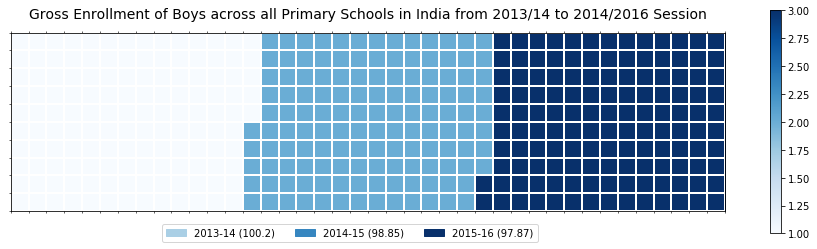

In [13]:
categories = df_waffle.Year # categories
values_pb = df_waffle['Primary_Boys'] # correponding values of categories
title = "Gross Enrollment of Boys across all Primary Schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.Blues
create_waffle_chart(categories, values_pb, title, colormap)

Total number of tiles is 400
2013-14: 135
2014-15: 133
2015-16: 132


<Figure size 432x288 with 0 Axes>

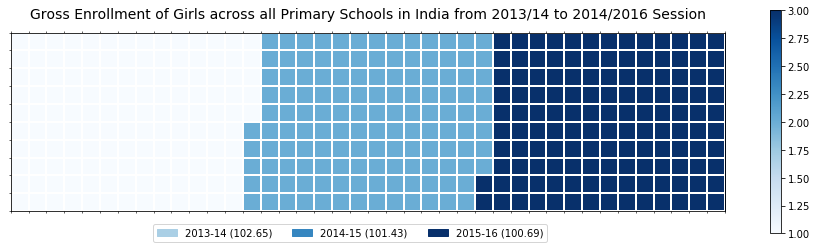

In [14]:
categories = df_waffle.Year # categories
values_pg = df_waffle['Primary_Girls'] # correponding values of categories
title = "Gross Enrollment of Girls across all Primary Schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.Blues

create_waffle_chart(categories, values_pg, title, colormap)

Total number of tiles is 400
2013-14: 131
2014-15: 134
2015-16: 135


<Figure size 432x288 with 0 Axes>

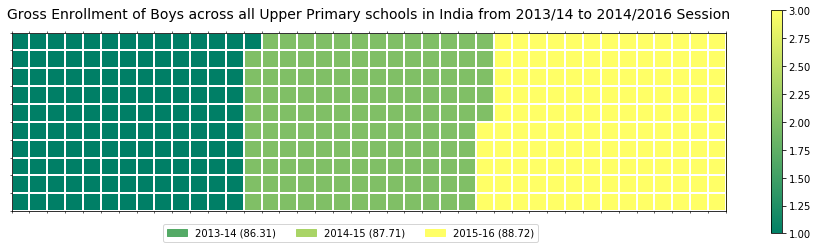

In [15]:
values_upb = df_waffle['Upper_Primary_Boys'] # correponding values of categories
title = "Gross Enrollment of Boys across all Upper Primary schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.summer
create_waffle_chart(categories, values_upb, title, colormap)

Total number of tiles is 400
2013-14: 130
2014-15: 133
2015-16: 137


<Figure size 432x288 with 0 Axes>

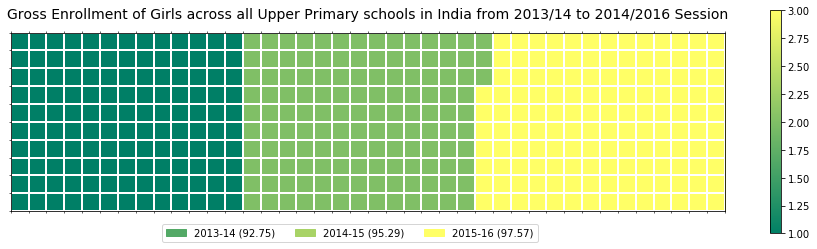

In [16]:
values_upg = df_waffle['Upper_Primary_Girls'] # correponding values of categories
title = "Gross Enrollment of Girls across all Upper Primary schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.summer

create_waffle_chart(categories, values_upg, title, colormap)

Total number of tiles is 400
2013-14: 131
2014-15: 134
2015-16: 135


<Figure size 432x288 with 0 Axes>

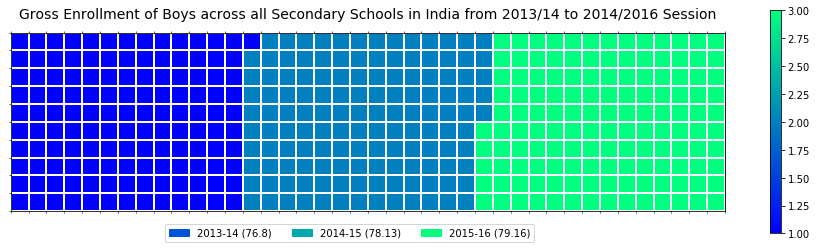

In [17]:
values_secb = df_waffle['Secondary_Boys'] # correponding values of categories
title = "Gross Enrollment of Boys across all Secondary Schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.winter
create_waffle_chart(categories, values_secb, title, colormap)

Total number of tiles is 400
2013-14: 129
2014-15: 134
2015-16: 137


<Figure size 432x288 with 0 Axes>

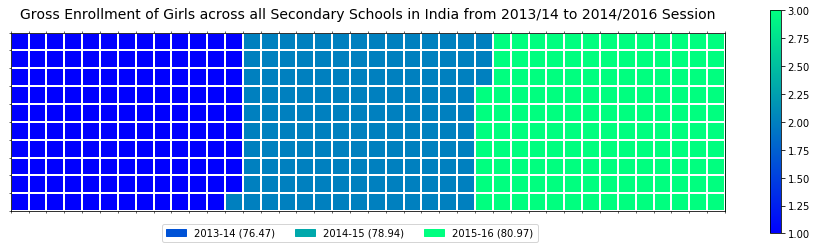

In [18]:
values_secg = df_waffle['Secondary_Girls'] # correponding values of categories
title = "Gross Enrollment of Girls across all Secondary Schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.winter

create_waffle_chart(categories, values_secg, title, colormap)

Total number of tiles is 400
2013-14: 129
2014-15: 134
2015-16: 137


<Figure size 432x288 with 0 Axes>

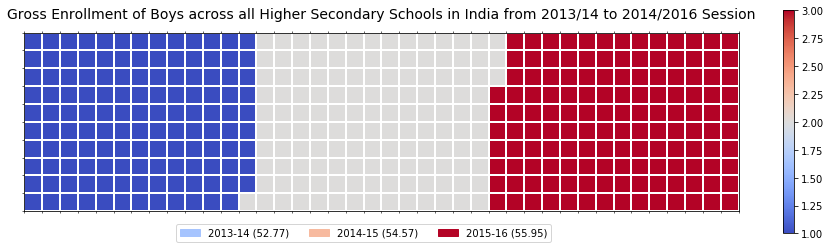

In [19]:
values_hsecb = df_waffle['Higher_Secondary_Boys'] # correponding values of categories
title = "Gross Enrollment of Boys across all Higher Secondary Schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.coolwarm
create_waffle_chart(categories, values_hsecb, title, colormap)

Total number of tiles is 400
2013-14: 128
2014-15: 133
2015-16: 139


<Figure size 432x288 with 0 Axes>

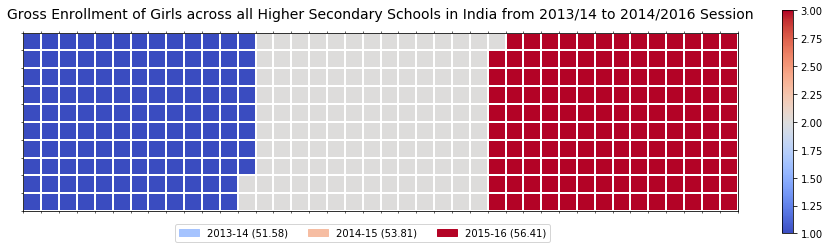

In [20]:
values_hsecg = df_waffle['Higher_Secondary_Girls'] # correponding values of categories
title = "Gross Enrollment of Girls across all Higher Secondary Schools in India from 2013/14 to 2014/2016 Session"
colormap = plt.cm.coolwarm
create_waffle_chart(categories, values_hsecg, title, colormap)